In [1]:
import pandas as pd

# Adjust the filename for your Sierra Leone dataset
df = pd.read_csv(r'C:\Users\Robel\OneDrive\solar-challenge-week0\data\data\sierraleone-bumbuna.csv')
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [2]:
df.describe()


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [3]:
df.isnull().sum()


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [4]:
missing = df.isnull().sum() / len(df)
print(missing[missing > 0.05])


Comments    1.0
dtype: float64


In [5]:
from scipy.stats import zscore

outlier_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']  # update if columns differ
zscores = df[outlier_cols].apply(zscore)
outlier_mask = (zscores.abs() > 3).any(axis=1)
print("Outlier rows:", outlier_mask.sum())


Outlier rows: 16292


In [6]:
df_clean = df[~outlier_mask].copy()
for col in outlier_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())


In [8]:
df_clean.to_csv(r'C:\Users\Robel\OneDrive\solar-challenge-week0\data\data\sierraleone-bumbuna.csv', index=False)


c:\Users\Robel\OneDrive\solar-challenge-week0\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


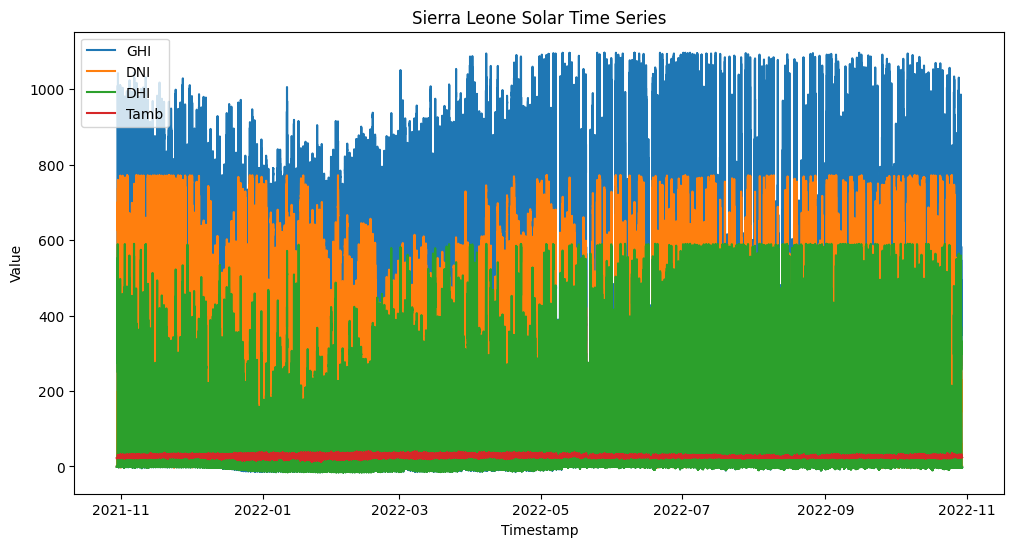

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(pd.to_datetime(df_clean['Timestamp']), df_clean['GHI'], label='GHI')
plt.plot(pd.to_datetime(df_clean['Timestamp']), df_clean['DNI'], label='DNI')
plt.plot(pd.to_datetime(df_clean['Timestamp']), df_clean['DHI'], label='DHI')
plt.plot(pd.to_datetime(df_clean['Timestamp']), df_clean['Tamb'], label='Tamb')
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Sierra Leone Solar Time Series')
plt.show()


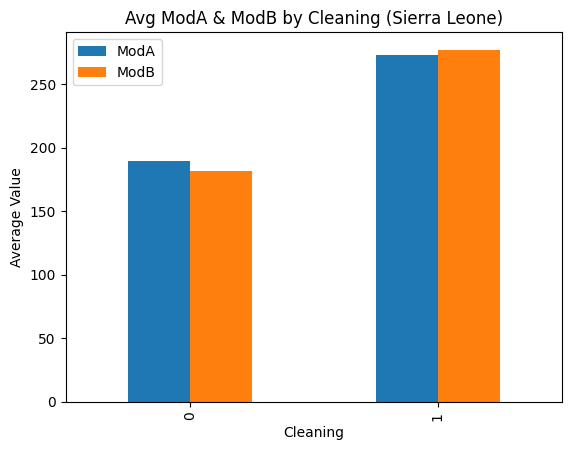

In [10]:
df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot.bar()
plt.title('Avg ModA & ModB by Cleaning (Sierra Leone)')
plt.xlabel('Cleaning')
plt.ylabel('Average Value')
plt.show()


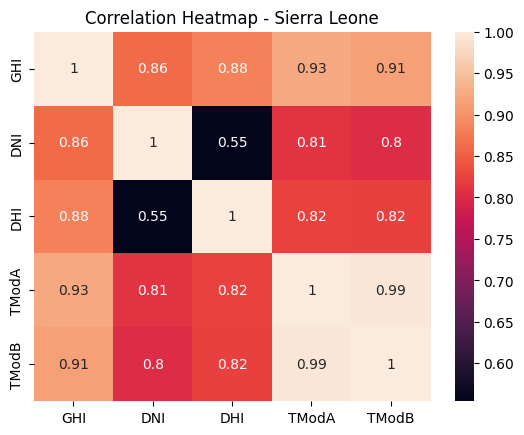

In [11]:
import seaborn as sns

corr = df_clean[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap - Sierra Leone')
plt.show()


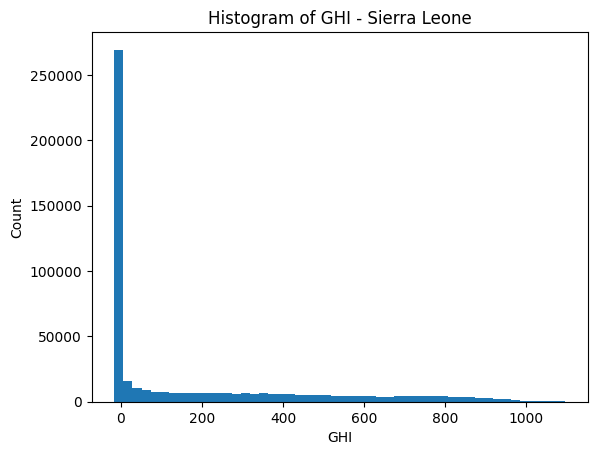

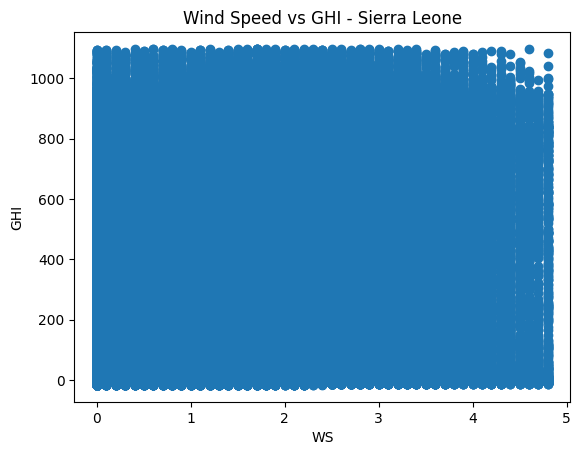

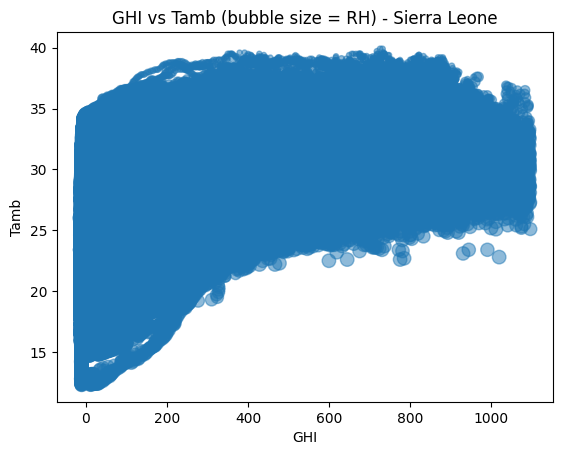

In [12]:
plt.hist(df_clean['GHI'], bins=50)
plt.xlabel('GHI')
plt.ylabel('Count')
plt.title('Histogram of GHI - Sierra Leone')
plt.show()

plt.scatter(df_clean['WS'], df_clean['GHI'])
plt.xlabel('WS')
plt.ylabel('GHI')
plt.title('Wind Speed vs GHI - Sierra Leone')
plt.show()

plt.scatter(df_clean['GHI'], df_clean['Tamb'], s=df_clean['RH'], alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs Tamb (bubble size = RH) - Sierra Leone')
plt.show()


Summary for Sierra Leone

- Cleaned, explored, and visualized all key variables.
- Sierra Leone solar dataset is now standardized for comparison.
